In [1]:
from lineage_motif.plot import *
from lineage_motif.resample import *
from lineage_motif.simulate import *

In [348]:
base=0.475
inv_base=0.8-base
increment=-0.025

transition_matrix = np.array([[0.2, inv_base, 0, 0, 0, 0, base, 0, 0, 0, 0, 0],
                              [0, 0.2, inv_base+increment, 0, 0, 0, 0, base-increment, 0, 0, 0, 0],
                              [0, 0, 0.2, inv_base+increment*2, 0, 0, 0, 0, base-increment*2, 0, 0, 0],
                              [0, 0, 0, 0.2, inv_base+increment*3, 0, 0, 0, 0, base-increment*3, 0, 0],
                              [0, 0, 0, 0, 0.2, inv_base+increment*4, 0, 0, 0, 0, base-increment*4, 0],
                              [0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.8],
                              [0]*12,
                              [0]*12,
                              [0]*12,
                              [0]*12,
                              [0]*12,
                              [0]*12,])

In [351]:
all_trees_unsorted = [simulate_tree(transition_matrix, starting_progenitor='a', labels='abcdefABCDEF') for i in range(1000)]
all_trees_sorted = [sort_align_tree(i) for i in all_trees_unsorted]
all_trees_sorted[:10]

['(A,(B,B))',
 '(((B,B),(C,C)),A)',
 '(A,A)',
 '(A,((A,(B,(B,B))),(B,(C,C))))',
 '(A,((((B,B),(B,(((B,(B,(C,C))),(C,C)),B))),B),((D,((E,(F,F)),((F,F),(E,(E,E))))),((D,(D,D)),(D,D)))))',
 '((A,A),(A,(((B,(((B,(C,C)),(((D,(E,E)),(C,C)),C)),B)),(A,(B,(C,(C,C))))),A)))',
 '(((((C,C),((((C,(D,((E,(F,F)),((F,F),(F,F))))),(D,(E,E))),(C,(D,(E,E)))),B)),A),A),((B,B),(A,(B,(((((E,E),((E,(F,F)),((F,(F,(F,F))),F))),(D,(D,D))),C),(C,C))))))',
 '((A,A),(A,(A,(B,(C,C)))))',
 '(A,A)',
 '(A,A)']

In [352]:
all_cells = make_df_all_cells(all_trees_sorted, make_cell_dict(cell_fates), 'observed', True)
all_cells/all_cells.sum()

,observed
A,0.162293
B,0.181268
C,0.180561
D,0.182580
E,0.150484
F,0.142814


In [353]:
(doublet_dict, 
 cell_fates, 
 dfs_c) = resample_trees_doublets(all_trees_sorted, 
                                           num_resamples=1000, 
                                           replacement_bool=True, 
                                           cell_fates='auto'
                                           )

  0%|          | 0/1000 [00:00<?, ?it/s]

In [354]:
cell_color_dict = make_color_dict(cell_fates, ['#F89A3A', 
                                                    '#9C80B8', 
                                                    '#F071AB', 
                                                    '#F0E135',
                                                    '#5FC0D4', 
                                                    '#7EC352',
                                                    ])

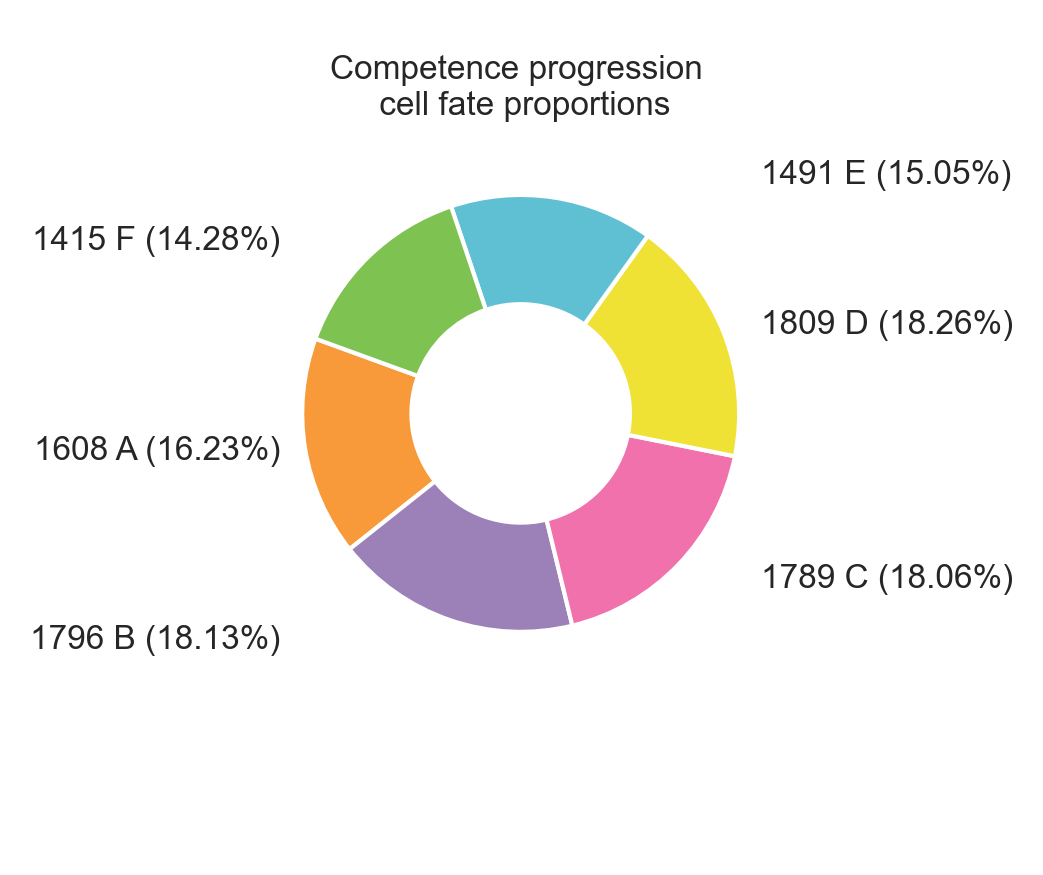

In [355]:
fig, ax = pyplot.subplots(1, 1, figsize=(3.25,3))
i=0

dict_all_cells_true = all_cells.sort_index()['observed'].to_dict()
cells = np.array([k for k, v in dict_all_cells_true.items()])
cell_counts = np.array([v for k, v in dict_all_cells_true.items()])
norm_cell_counts = np.round(cell_counts/cell_counts.sum()*100, 2)

norm_cell_counts_str = [f' ('+str(percent)+'%)' for ind, percent in enumerate(norm_cell_counts)]
annot = [str(count)+' '+cell+suffix for count, cell, suffix in zip(cell_counts, cells, norm_cell_counts_str)]

data = dict_all_cells_true.values()

colors_to_use = cell_color_dict.values()
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-200, colors=colors_to_use, )

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for b, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[b], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw, **{'fontname':'Arial', 'size':8})

ax.set_title(f"Competence progression \n cell fate proportions", y=1, **{'fontname':'Arial', 'size':8})

pyplot.tight_layout(h_pad=-8, w_pad=4)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pyplot.grid(False)
#pyplot.title("Cell fate proportions across zebrafish retina regions", y=0, **{'fontname':'Arial', 'size':8}, fontweight="bold")

image_format = 'svg'

pyplot.savefig(f"comp_prog_cell_fate_proportions_v02.{image_format}", dpi=300, bbox_inches="tight")

In [356]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_null_zscores_i_c_melt_subset, 
 df_null_zscores_i_c_melt_100resamples_subset) = dfs_for_plotting(dfs_c, 
                                                                       1000, 
                                                                       doublet_dict, 
                                                                       cutoff=None, 
                                                                       num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

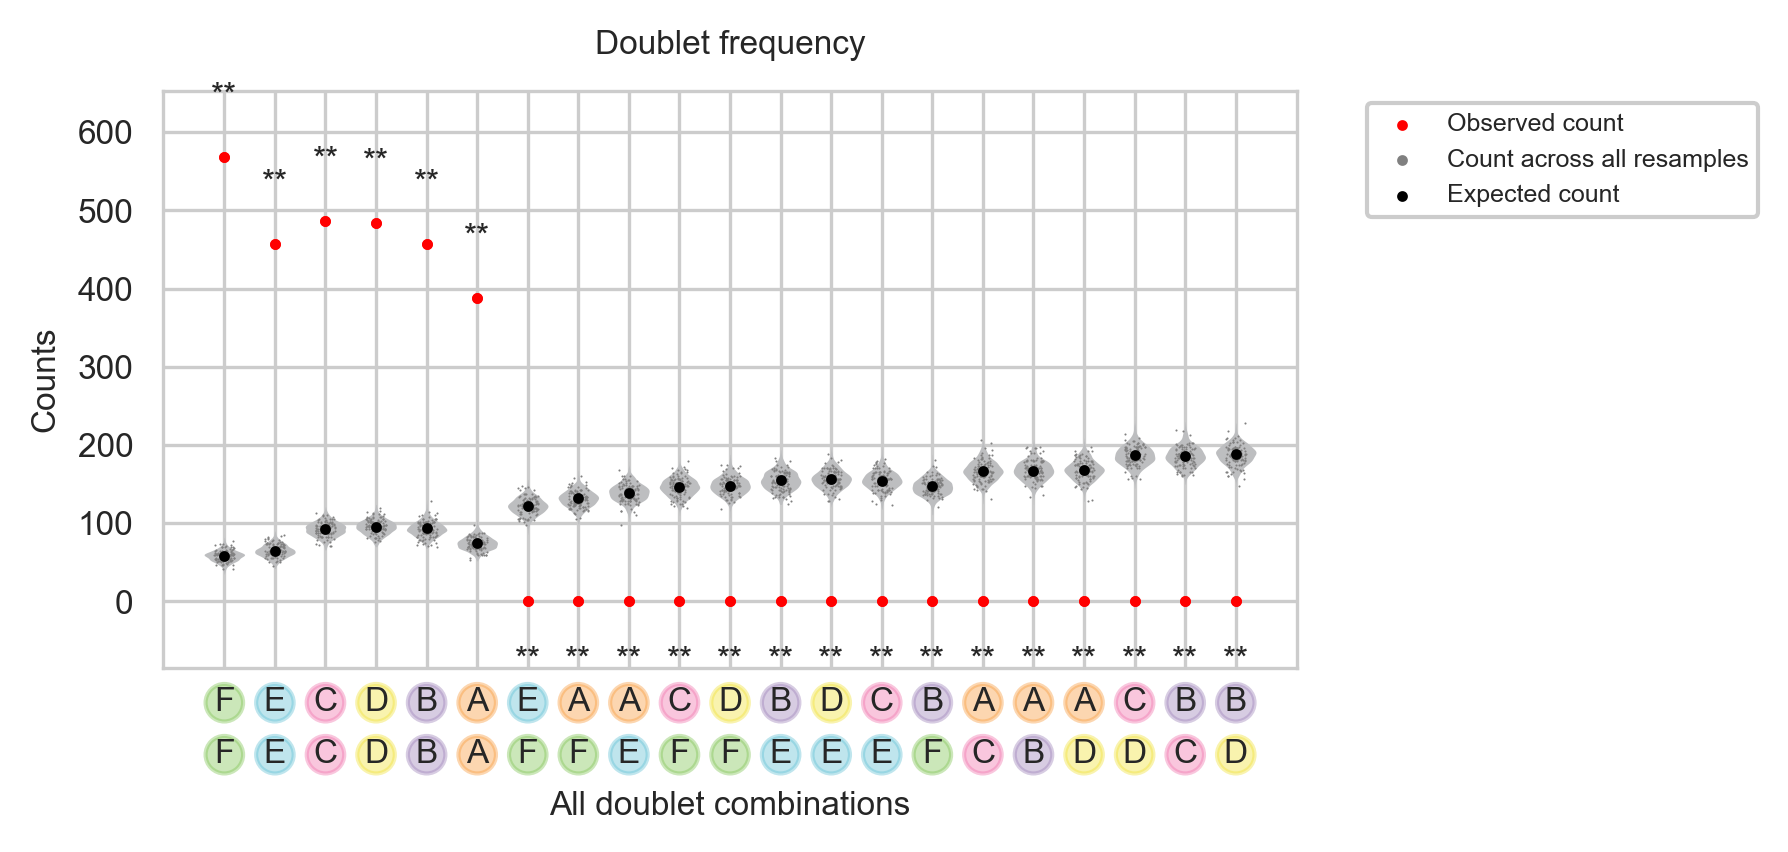

In [357]:
plot_frequency('doublet', 
                    df_true_melt_subset, 
                    df_melt_subset, 
                    df_melt_100resamples_subset, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=None, 
                    title='auto',
                    multiple_datasets=False,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

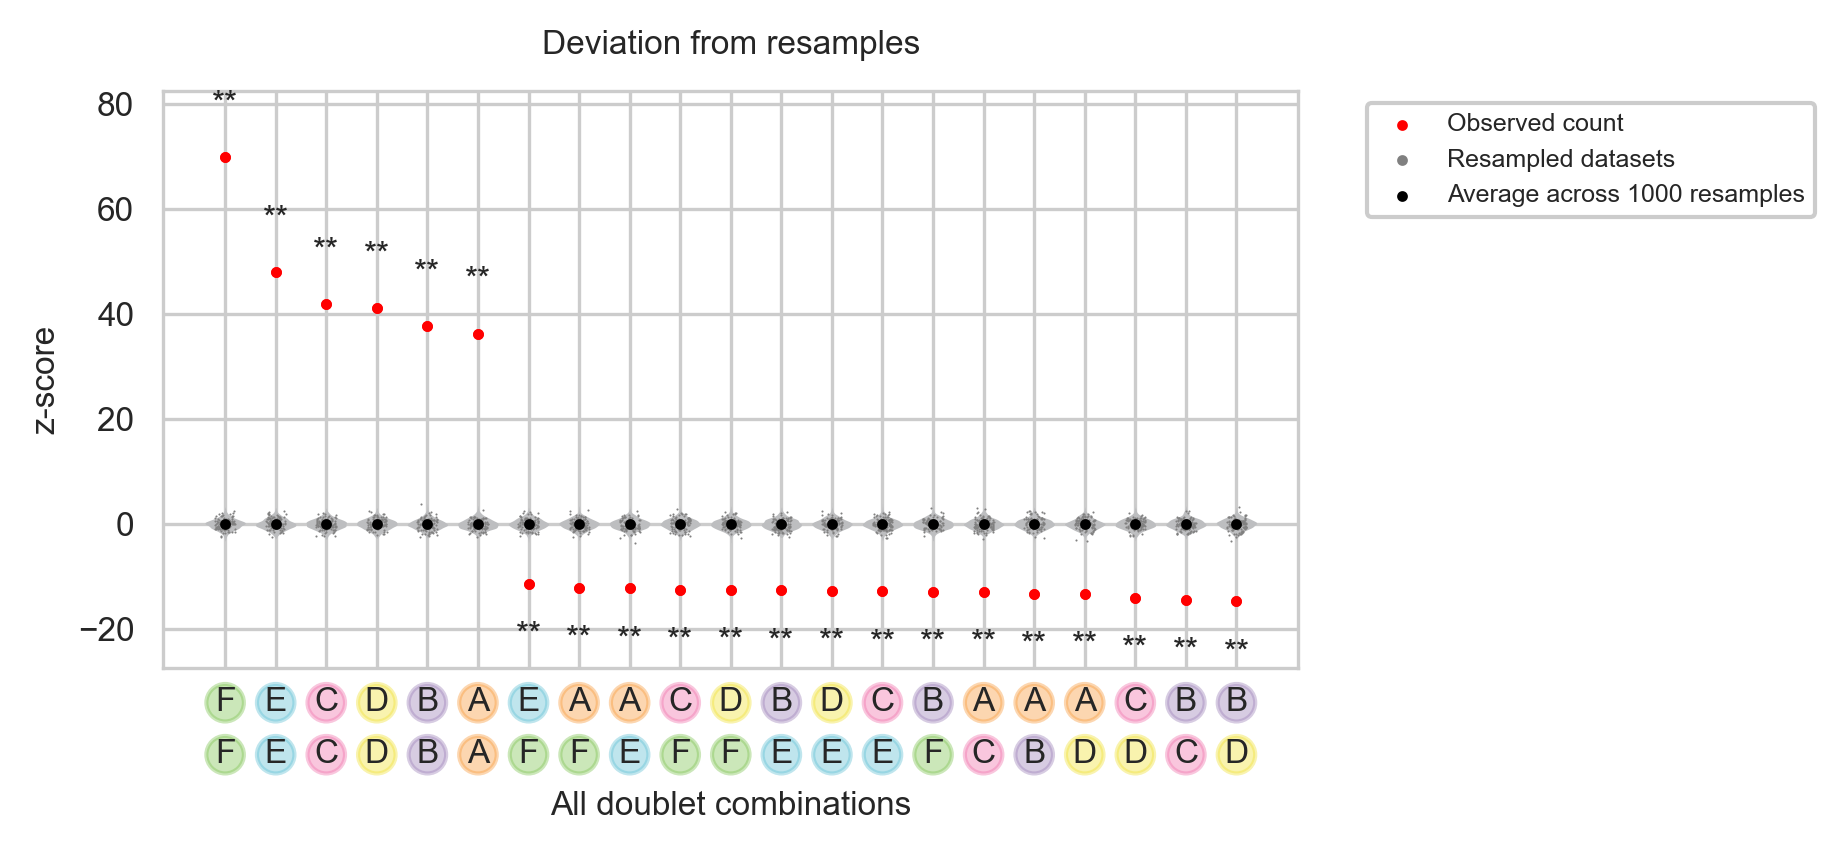

In [358]:
plot_deviation('doublet', 
                    df_true_melt_subset, 
                    df_null_zscores_i_c_melt_subset, 
                    df_null_zscores_i_c_melt_100resamples_subset, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=None, 
                    title='auto',
                    multiple_datasets=False,
                    num_null=1000,
                    legend_bool=True,
                    legend_pos='outside',
                    save=True, 
                    image_format='svg',
                    dpi=300,
                    image_save_path='comp_prog_dev_doublet_v02')

In [359]:
(triplet_dict, 
 cell_fates, 
 dfs_c) = resample_trees_triplets(all_trees_sorted, 
                                           num_resamples=1000, 
                                           replacement_bool=True, 
                                           cell_fates='auto'
                                           )

  0%|          | 0/1000 [00:00<?, ?it/s]

In [360]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_null_zscores_i_c_melt_subset, 
 df_null_zscores_i_c_melt_100resamples_subset) = dfs_for_plotting(dfs_c, 
                                                                       1000, 
                                                                       triplet_dict, 
                                                                       cutoff=15, 
                                                                       num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

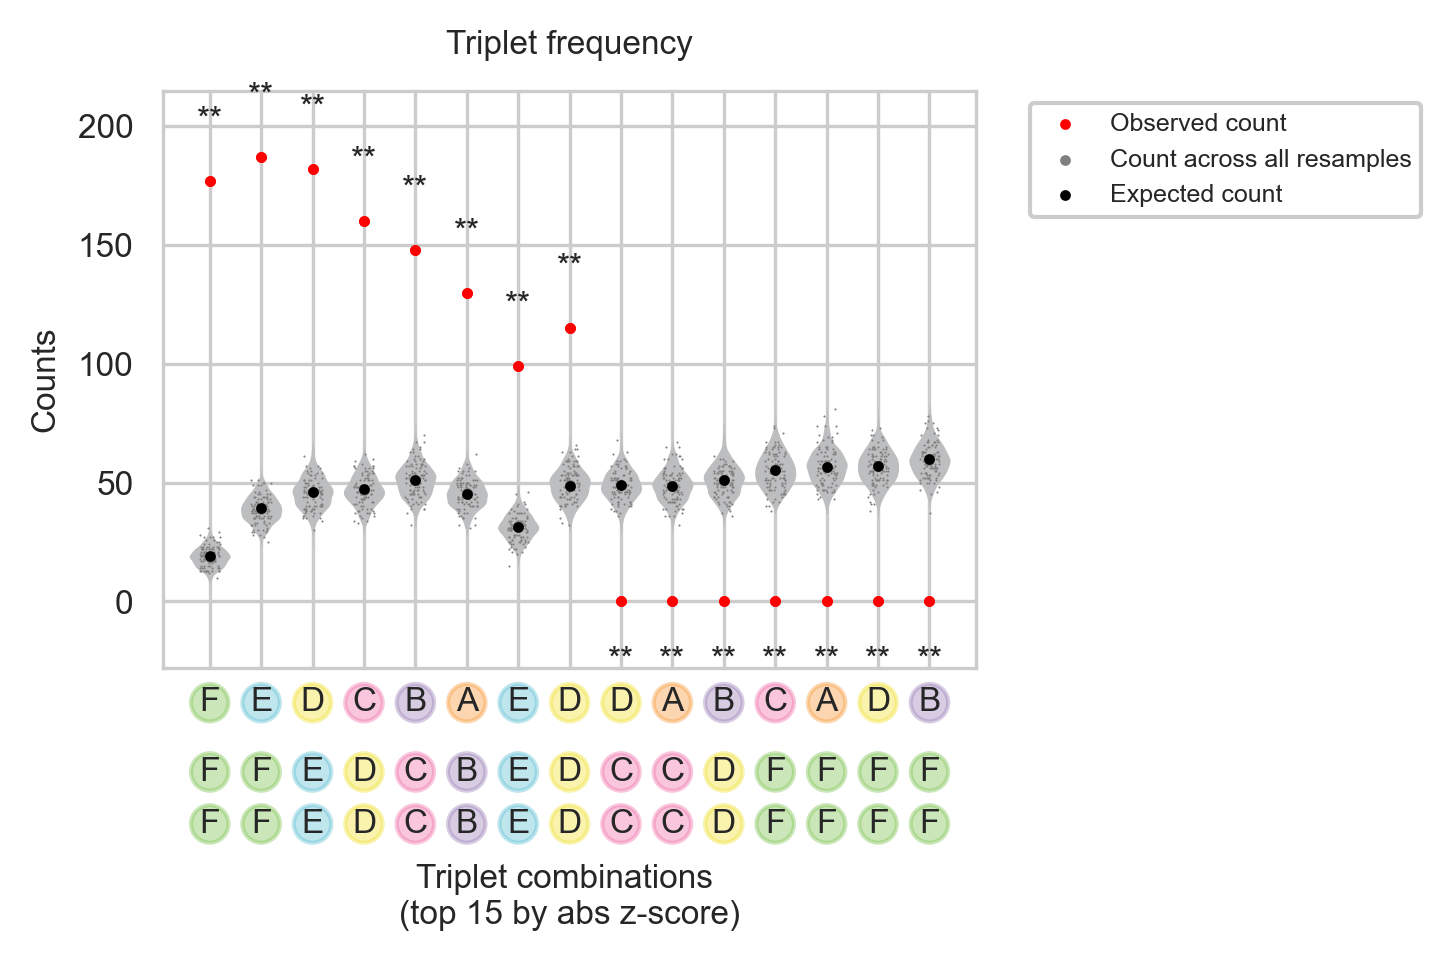

In [361]:
plot_frequency('triplet', 
                    df_true_melt_subset, 
                    df_melt_subset, 
                    df_melt_100resamples_subset, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=15, 
                    title='auto',
                    multiple_datasets=False,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

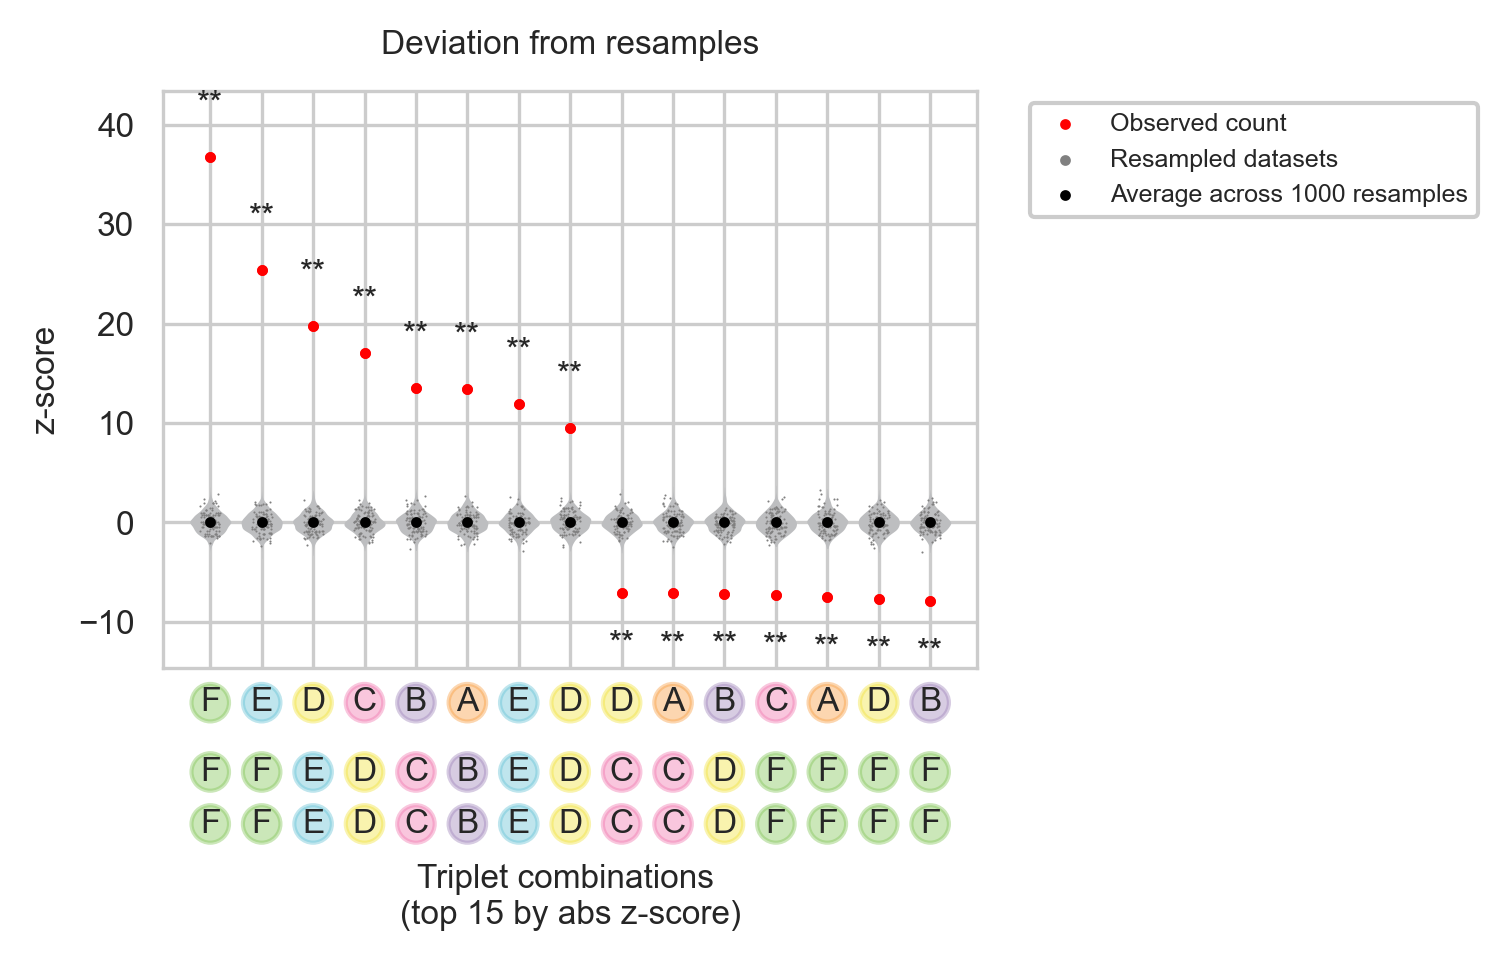

In [362]:
plot_deviation('triplet', 
                    df_true_melt_subset, 
                    df_null_zscores_i_c_melt_subset, 
                    df_null_zscores_i_c_melt_100resamples_subset, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=15, 
                    title='auto',
                    multiple_datasets=False,
                    num_null=1000,
                    legend_bool=True,
                    legend_pos='outside',
                    save=True, 
                    image_format='svg',
                    dpi=300,
                    image_save_path='comp_prog_dev_triplet_v02')

In [363]:
(asym_quartet_dict, 
 cell_fates, 
 dfs_c) = resample_trees_asym_quartets(all_trees_sorted, 
                                           num_resamples=1000, 
                                           replacement_bool=True, 
                                           cell_fates='auto'
                                           )

  0%|          | 0/1000 [00:00<?, ?it/s]

In [364]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_null_zscores_i_c_melt_subset, 
 df_null_zscores_i_c_melt_100resamples_subset) = dfs_for_plotting(dfs_c, 
                                                                       1000, 
                                                                       asym_quartet_dict, 
                                                                       cutoff=25, 
                                                                       num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

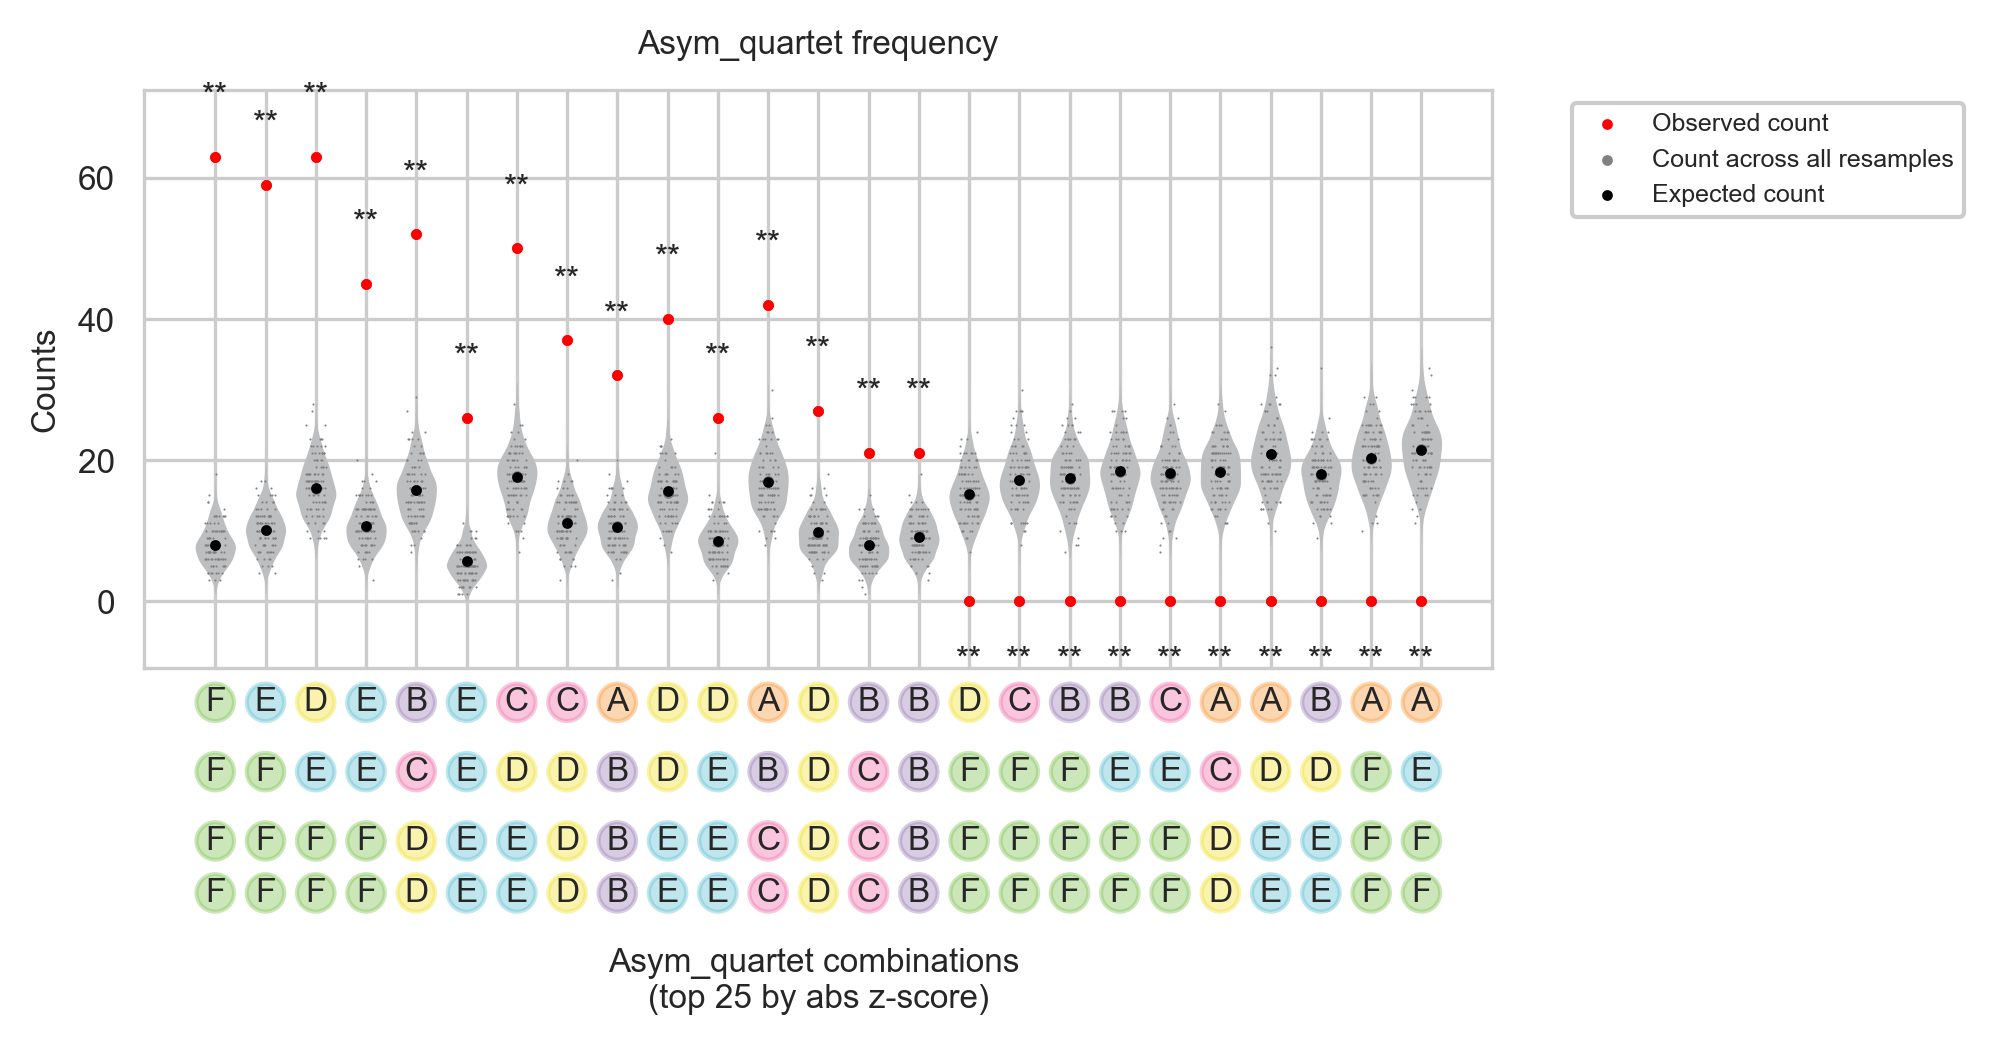

In [365]:
plot_frequency('asym_quartet', 
                    df_true_melt_subset, 
                    df_melt_subset, 
                    df_melt_100resamples_subset, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=40, 
                    title='auto',
                    multiple_datasets=False,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

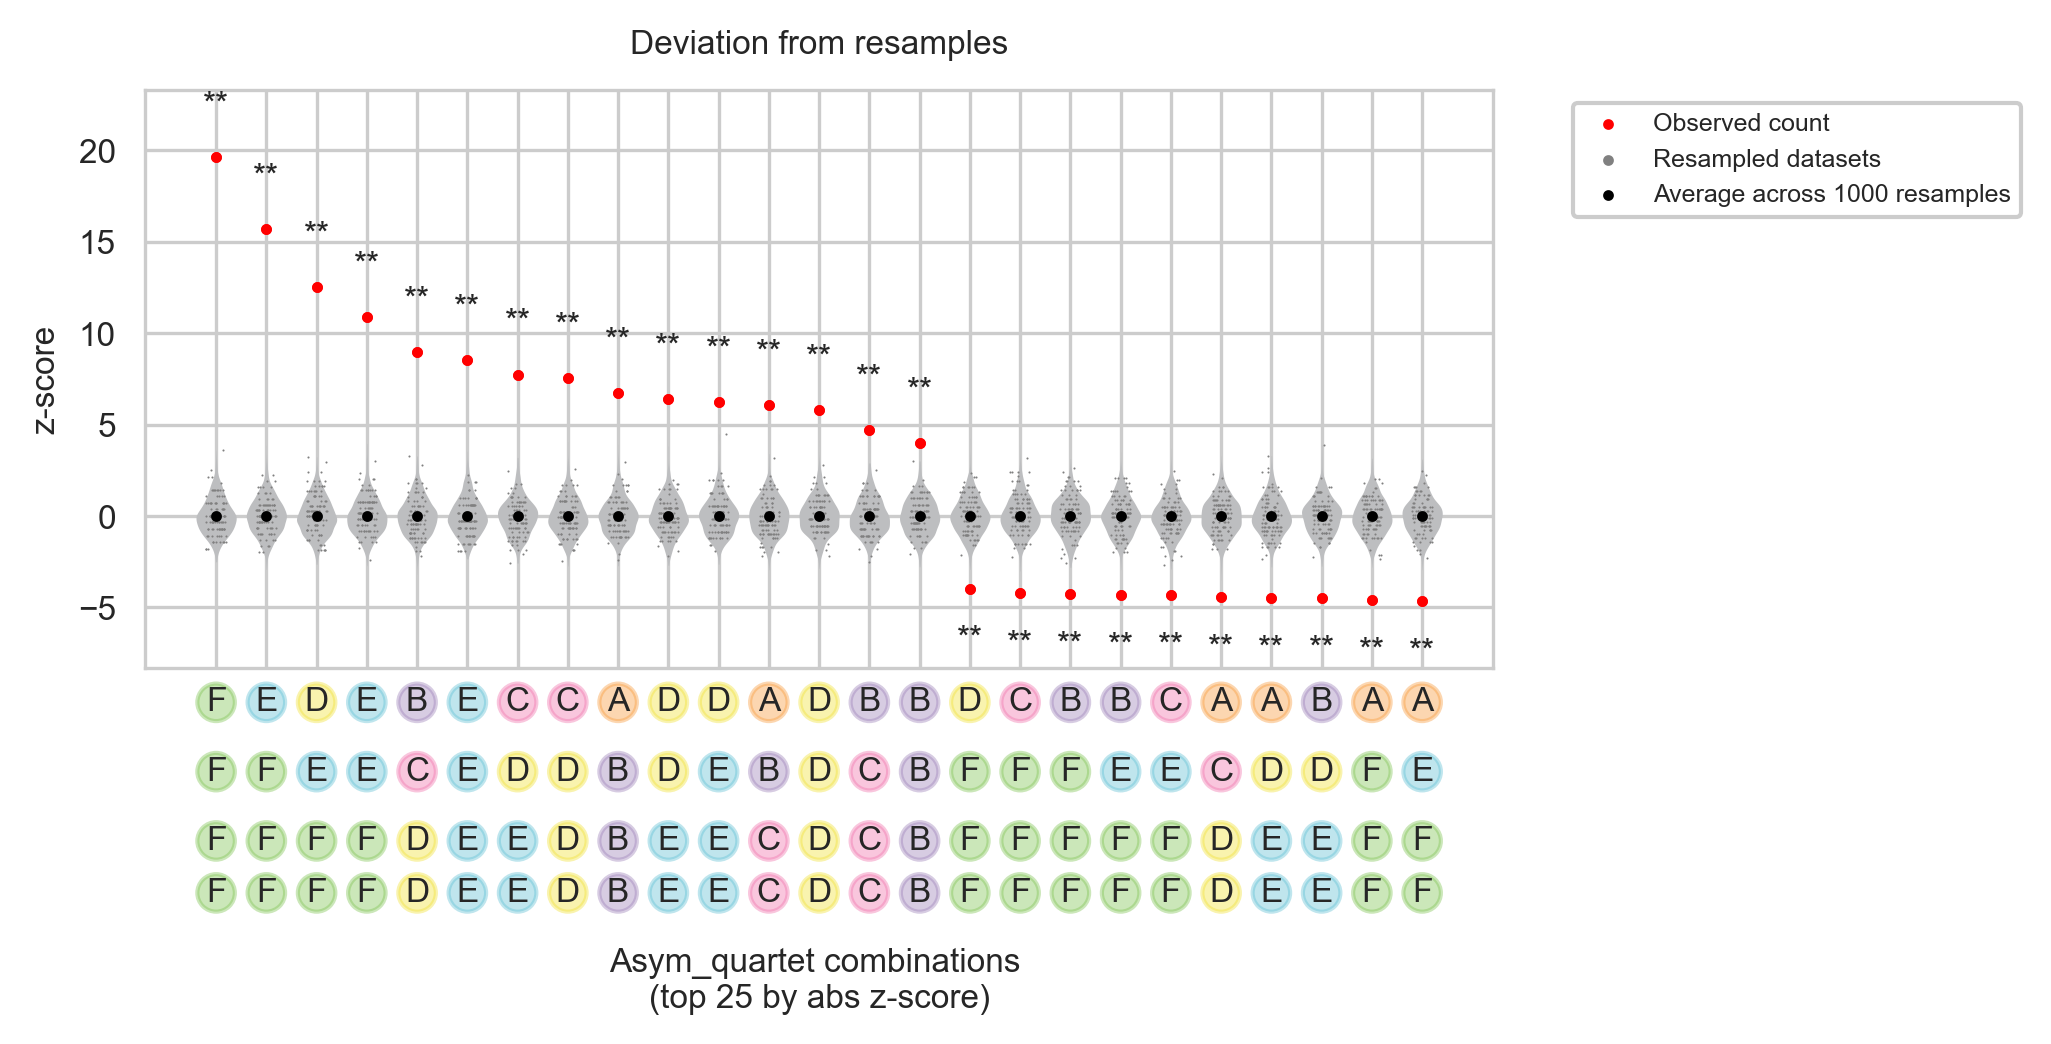

In [366]:
plot_deviation('asym_quartet', 
                    df_true_melt_subset, 
                    df_null_zscores_i_c_melt_subset, 
                    df_null_zscores_i_c_melt_100resamples_subset, 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff=40, 
                    title='auto',
                    multiple_datasets=False,
                    num_null=1000,
                    legend_bool=True,
                    legend_pos='outside',
                    save=True, 
                    image_format='svg',
                    dpi=300,
                    image_save_path='comp_prog_dev_asym_quartet_v02')